<a href="https://colab.research.google.com/github/sagiodev/stablediffusion_webui/blob/master/sampler_convergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
import glob
dirstr='drive/MyDrive/AI_PICS/outputs/txt2img-images/*/'
samplers = glob.glob(dirstr)

In [ ]:
import numpy as np
import PIL
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

converge = dict()

for samplerDir in samplers:
  imgFiles = glob.glob(samplerDir +'/*')
  im_final = PIL.Image.open(imgFiles[-1])
  im_final = np.asarray(im_final)
  samplerName = ''
  i = -1
  while samplerName == '':
    samplerName = samplerDir.split('/')[i]
    i -= 1
  convergence = []
  for fn in imgFiles:
    im=PIL.Image.open(fn)
    im = np.asarray(im)
    s = ssim(im, im_final, channel_axis=2)  
    #d = float((abs(np.asarray(im) - np.asarray(im_final)) ).sum())/float((np.asarray(im_final)).sum())
    convergence.append(s)

  converge[samplerName] = 1-np.array(convergence)

In [ ]:
[name for name in converge]

['Euler a',
 'Euler',
 'Heun',
 'DPM2',
 'DPM2 a',
 'DPM++ 2S a',
 'DPM++ 2M',
 'DPM++ SDE',
 'DPM fast',
 'DPM adaptive',
 'LMS Karras',
 'DPM2 Karras',
 'DPM2 a Karras',
 'DPM++ 2S a Karras',
 'DPM++ 2M Karras',
 'DPM++ SDE Karras',
 'DDIM',
 'PLMS',
 'UniPC']

Text(0, 0.5, 'SSIM')

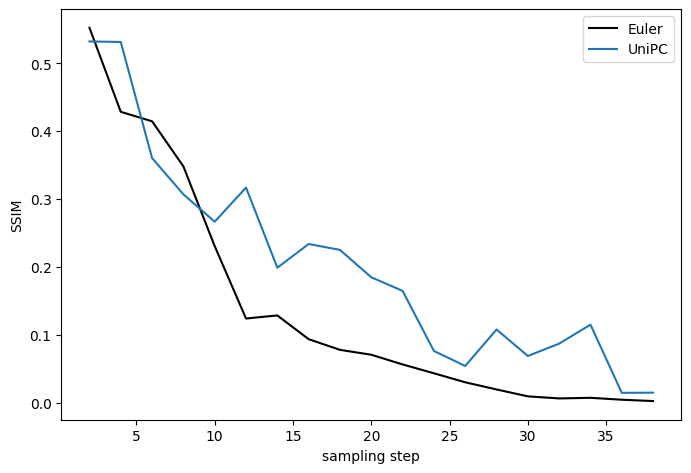

In [ ]:
import matplotlib.pyplot as plt
steps = range(2,42,2)
legstr = []
ref = 'Euler'

figLength = 8
plt.figure(figsize = (figLength,figLength*2/3))
plt.plot(steps[0:-1], converge[ref][0:-1], 'k')
legstr.append('Euler')

numPlotted = 0
#samplersToPlot = [name for name in converge if ' a' in name and not 'adaptive' in name]

#samplersToPlot = [name for name in converge if '++' in name and not ' a' in name]
#samplersToPlot.append('DPM adaptive')

samplersToPlot = ['UniPC']

# samplersToPlot = ['DDIM', 'PLMS', 'Heun', 'LMS Karras']

for sampler in samplersToPlot:
  if sampler == ref: continue
  plt.plot(steps[0:-1], converge[sampler][0:-1])
  legstr.append(sampler)
  numPlotted += 1
plt.legend(legstr)
plt.xlabel('sampling step')
plt.ylabel('SSIM')


# time

In [ ]:
! ls {samplers[1]}

00043-3143499872.png  00050-3143499872.png  00057-3143499872.png
00044-3143499872.png  00051-3143499872.png  00058-3143499872.png
00045-3143499872.png  00052-3143499872.png  00059-3143499872.png
00046-3143499872.png  00053-3143499872.png  00060-3143499872.png
00047-3143499872.png  00054-3143499872.png  00061-3143499872.png
00048-3143499872.png  00055-3143499872.png  00062-3143499872.png
00049-3143499872.png  00056-3143499872.png


In [ ]:
import os
samplingTime = {}
for samplerDir in samplers:
  imgFiles = sorted(glob.glob(samplerDir +'/*'))
  dt = os.path.getmtime(imgFiles[-1])  - os.path.getmtime(imgFiles[0]) 
  #print(imgFiles[-1], imgFiles[0])

  samplerName = ''
  i = -1
  while samplerName == '':
    samplerName = samplerDir.split('/')[i]
    i -= 1

  samplingTime[samplerName] = dt

for s in samplingTime:
  print(s, ', ', samplingTime[s])

Euler a ,  74.0
Euler ,  74.0
Heun ,  144.0
DPM2 ,  146.0
DPM2 a ,  146.0
DPM++ 2S a ,  136.0
DPM++ 2M ,  78.0
DPM++ SDE ,  148.0
DPM fast ,  78.0
DPM adaptive ,  335.0
LMS Karras ,  78.0
DPM2 Karras ,  145.0
DPM2 a Karras ,  146.0
DPM++ 2S a Karras ,  145.0
DPM++ 2M Karras ,  78.0
DPM++ SDE Karras ,  147.0
DDIM ,  80.0
PLMS ,  84.0
UniPC ,  80.0


{'Euler a': 74.0,
 'Euler': 114.0,
 'Heun': 144.0,
 'DPM2': 146.0,
 'DPM2 a': 146.0,
 'DPM++ 2S a': 136.0,
 'DPM++ 2M': 78.0,
 'DPM++ SDE': 148.0,
 'DPM fast': 78.0,
 'DPM adaptive': 335.0,
 'LMS Karras': 78.0,
 'DPM2 Karras': 145.0,
 'DPM2 a Karras': 146.0,
 'DPM++ 2S a Karras': 145.0,
 'DPM++ 2M Karras': 78.0,
 'DPM++ SDE Karras': 147.0,
 'DDIM': 80.0,
 'PLMS': 84.0,
 'UniPC': 80.0}

In [ ]:
img1.shape

(512, 512, 3)

# Perceptual quality (Brisque)

In [ ]:
# !pip install brisque
!pip install git+https://github.com/ocampor/image-quality.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ocampor/image-quality.git to /tmp/pip-req-build-60atz6on
  Running command git clone --filter=blob:none --quiet https://github.com/ocampor/image-quality.git /tmp/pip-req-build-60atz6on
  Resolved https://github.com/ocampor/image-quality.git to commit faf6a94382acd9a1469d2244497df0d879b3a714
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.6/170.6 KB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for image-quality: filename=image_quality-1.3.0-py3-none-any.whl size=146603 sha256=ad108996fa06cadea7adff146d8e7784f407a548c3fac28e9657356ef760aacc
  Stored in directory: /tmp/pip-ephem-wheel-cache-h51d8zpn/wheels/4e/14/9f/3bd87bb2fdaa2396d526b168061c4de3c62023ec0cbc876006
  Created wheel for libsvm: filename=libsvm-3.23.0.4-cp39-cp39-linux_x86_64.whl size=253857 sha256=45e9c0e7ef9a5910364e2abde7a

In [ ]:
def sampleNameFromDir(samplerDir):
  samplerName = ''
  i = -1
  while samplerName == '':
    samplerName = samplerDir.split('/')[i]
    i -= 1
  return samplerName

In [ ]:
import os
#from brisque import BRISQUE
import imquality.brisque as imbrisque
import PIL
samplerQuality = {}
#obj = BRISQUE(url=False)
for samplerDir in samplers:
  imgFiles = sorted(glob.glob(samplerDir +'/*'))
  name = sampleNameFromDir(samplerDir)
  qual = []
  for imgf in imgFiles:
    # im = np.asarray(PIL.Image.open(imgf))
    # qual.append(obj.score( im))

    im = PIL.Image.open(imgf)
    try:
      score = imbrisque.score(im)
    except:
      score = 100
    qual.append(score)
  samplerQuality[name] = qual


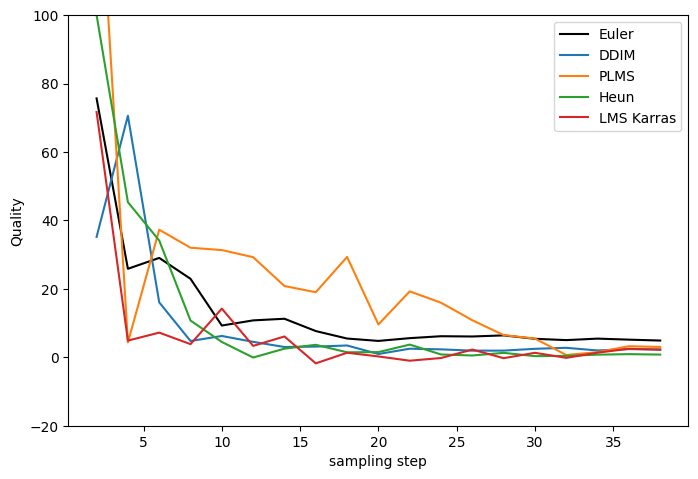

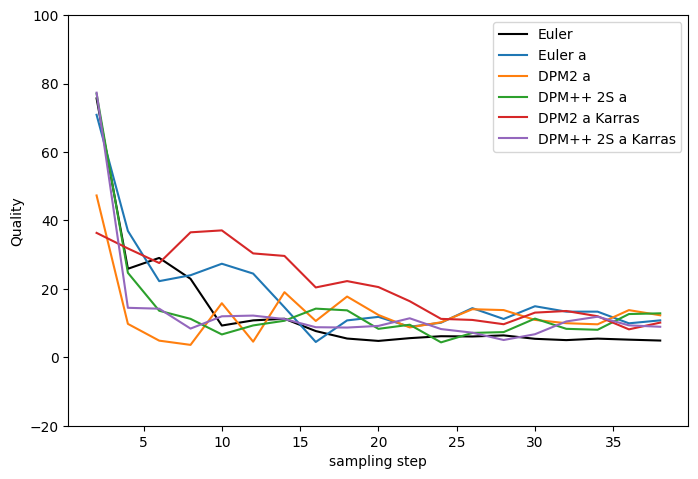

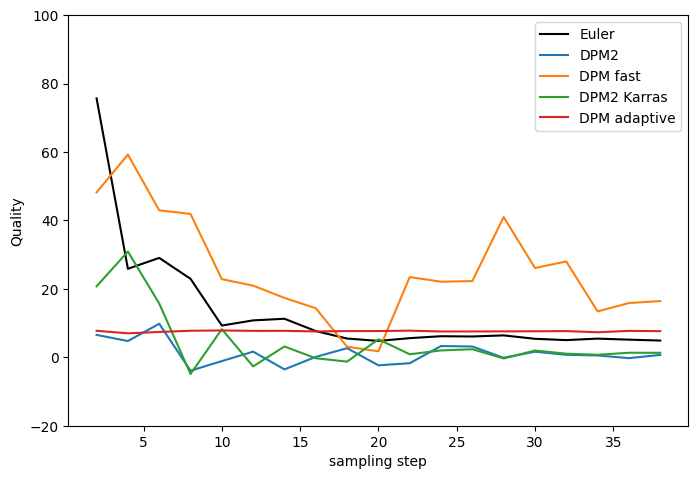

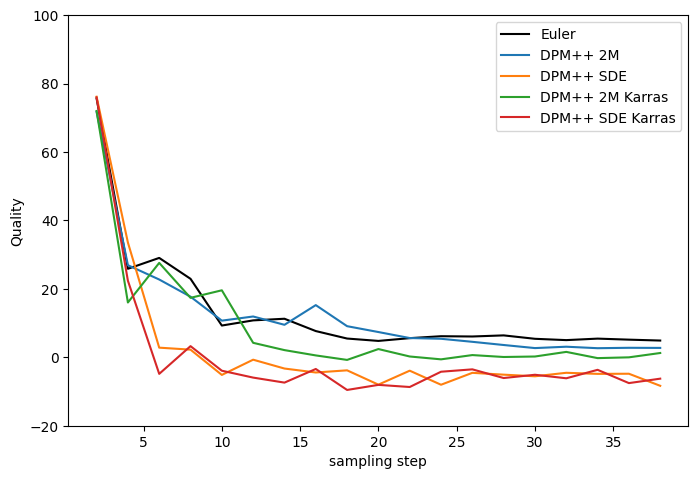

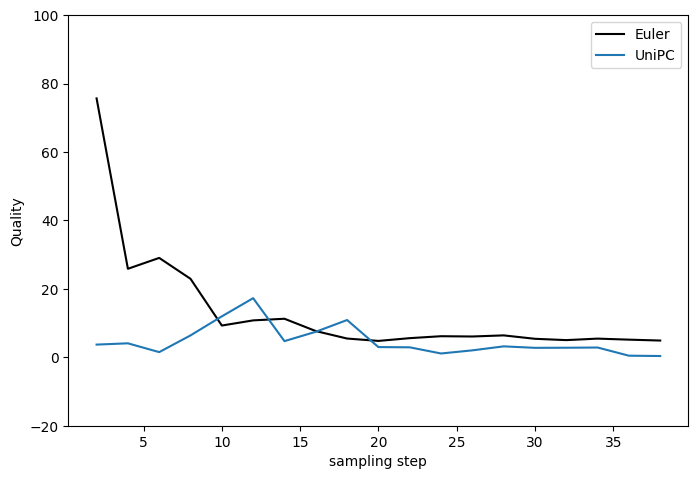

In [ ]:
import matplotlib.pyplot as plt
steps = range(2,42,2)


figLength = 8

numPlotted = 0
samplerGroups = []

samplerGroups.append( ['DDIM', 'PLMS', 'Heun', 'LMS Karras'] )

# ancestral samplers
samplersToPlot = [name for name in samplerQuality if ' a' in name and not 'adaptive' in name]
samplerGroups.append( samplersToPlot)
# DPM solvers
samplersToPlot = [name for name in samplerQuality if 'DPM' in name and not '++' in name and not ' a' in name]
samplersToPlot.append('DPM adaptive')
samplerGroups.append( samplersToPlot)

# DPM++ solvers
samplersToPlot = [name for name in samplerQuality if '++' in name and not ' a' in name]
samplerGroups.append( samplersToPlot)

#

samplersToPlot = ['UniPC']
samplerGroups.append( samplersToPlot)


for samplersToPlot in samplerGroups:
  plt.figure(figsize = (figLength,figLength*2/3))
  plt.plot(steps[0:-1], samplerQuality[ref][0:-1], 'k')
  legstr = []
  legstr.append('Euler')

  
  ref = 'Euler'  
  for sampler in samplersToPlot:
    if sampler == ref: continue
    plt.plot(steps[0:-1], samplerQuality[sampler][0:-1])
    legstr.append(sampler)
    numPlotted += 1
  plt.legend(legstr)
  plt.xlabel('sampling step')
  plt.ylabel('Quality')
  plt.ylim([-20,100])

# Perceptual quality (IQA)

In [ ]:
# Install latest github version
!pip uninstall pyiqa # if have older version installed already 
!pip install git+https://github.com/chaofengc/IQA-PyTorch.git



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/chaofengc/IQA-PyTorch.git to /tmp/pip-req-build-0jf74hbg
  Running command git clone --filter=blob:none --quiet https://github.com/chaofengc/IQA-PyTorch.git /tmp/pip-req-build-0jf74hbg
  Resolved https://github.com/chaofengc/IQA-PyTorch.git to commit 93477bcca71c3c1a2b26e88b935f73d572a00bad
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.9/305.9 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 93.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.2/190.2 KB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 69.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━

In [ ]:
import pyiqa
import torch

# list all available metrics
print(pyiqa.list_models())
device = torch.device("cuda")
# create metric with default setting
iqa_metric = pyiqa.create_metric('brisque', device=device)
# Note that gradient propagation is disabled by default. set as_loss=True to enable it as a loss function.
iqa_loss = pyiqa.create_metric('brisque', device=device, as_loss=True)

['ahiq', 'brisque', 'ckdn', 'clipiqa', 'clipiqa+', 'clipiqa+_rn50_512', 'clipiqa+_vitL14_512', 'cnniqa', 'cw_ssim', 'dbcnn', 'dists', 'fid', 'fsim', 'gmsd', 'hyperiqa', 'ilniqe', 'lpips', 'lpips-vgg', 'mad', 'maniqa', 'ms_ssim', 'musiq', 'musiq-ava', 'musiq-koniq', 'musiq-paq2piq', 'musiq-spaq', 'nima', 'nima-vgg16-ava', 'niqe', 'nlpd', 'nrqm', 'paq2piq', 'pi', 'pieapp', 'psnr', 'psnry', 'ssim', 'ssimc', 'tres', 'tres-flive', 'tres-koniq', 'vif', 'vsi']


In [ ]:
#score_fr = iqa_metric('./ResultsCalibra/dist_dir/I03.bmp', './ResultsCalibra/ref_dir/I03.bmp')

import os
samplerQuality = {}
for samplerDir in samplers:
  imgFiles = sorted(glob.glob(samplerDir +'/*'))
  name = sampleNameFromDir(samplerDir)
  qual = []
  for imgf in imgFiles:
    try:
      score = float(iqa_metric(imgf))
    except:
      score = 100
    qual.append(score)
  samplerQuality[name] = qual


In [ ]:
for name in samplerQuality:
  samplerQuality[name] = [float(i) for i in samplerQuality[name]]

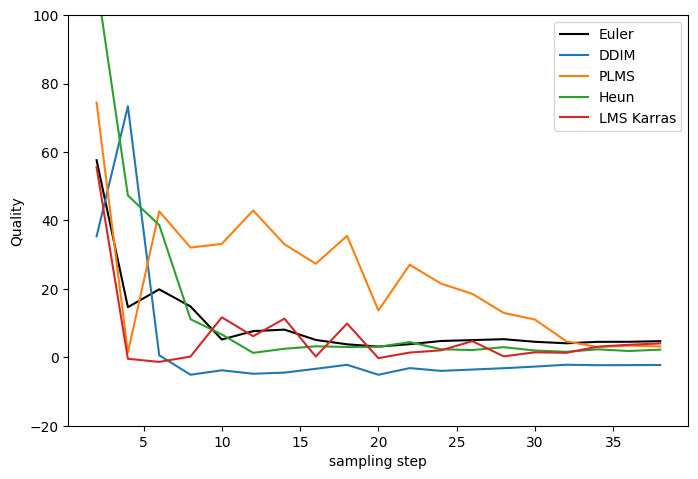

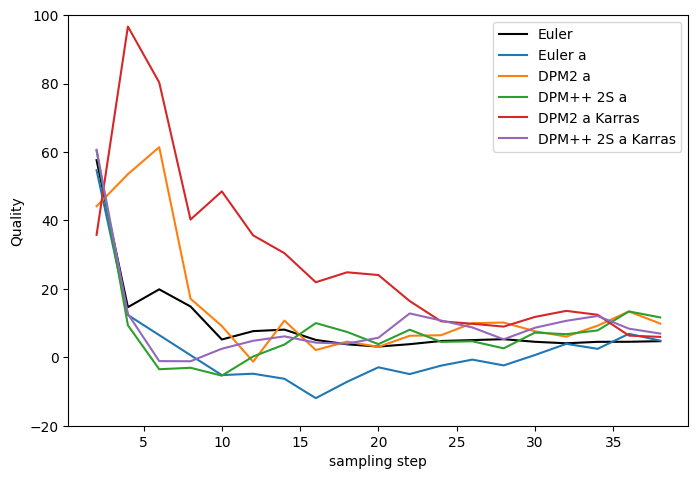

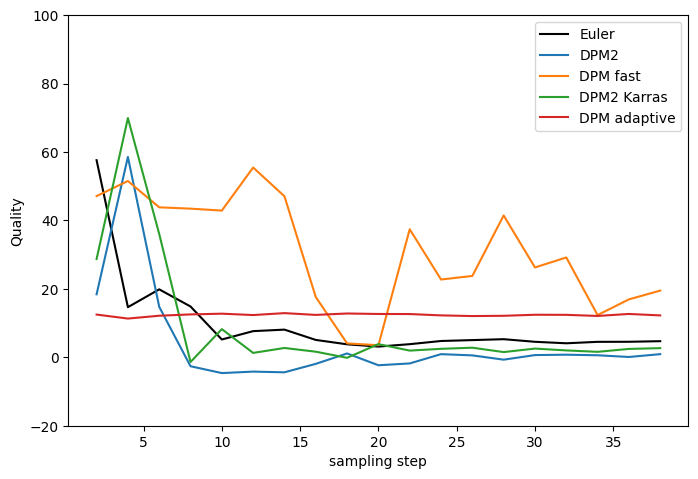

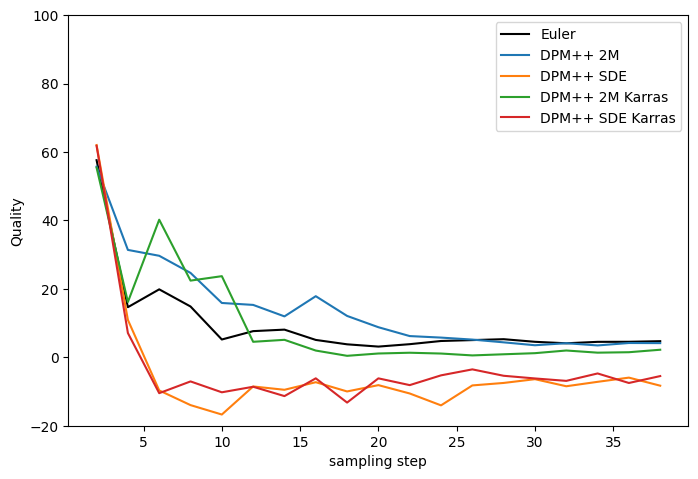

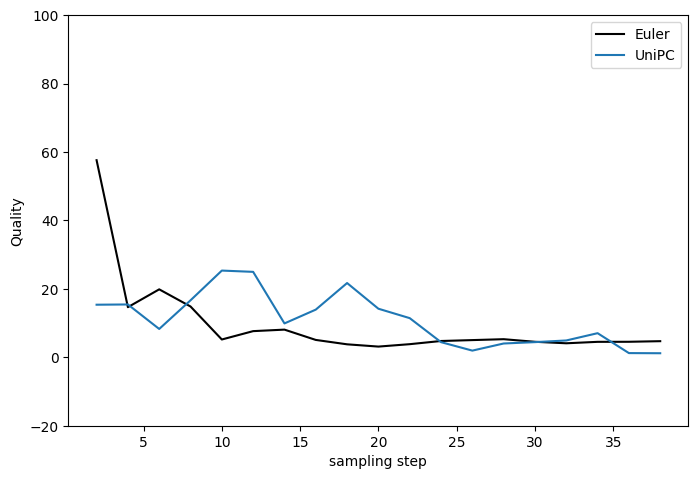

In [ ]:
import matplotlib.pyplot as plt
steps = range(2,42,2)


figLength = 8

numPlotted = 0
samplerGroups = []

samplerGroups.append( ['DDIM', 'PLMS', 'Heun', 'LMS Karras'] )

# ancestral samplers
samplersToPlot = [name for name in samplerQuality if ' a' in name and not 'adaptive' in name]
samplerGroups.append( samplersToPlot)
# DPM solvers
samplersToPlot = [name for name in samplerQuality if 'DPM' in name and not '++' in name and not ' a' in name]
samplersToPlot.append('DPM adaptive')
samplerGroups.append( samplersToPlot)

# DPM++ solvers
samplersToPlot = [name for name in samplerQuality if '++' in name and not ' a' in name]
samplerGroups.append( samplersToPlot)

#

samplersToPlot = ['UniPC']
samplerGroups.append( samplersToPlot)

ref = 'Euler'
for samplersToPlot in samplerGroups:
  plt.figure(figsize = (figLength,figLength*2/3))
  plt.plot(steps[0:-1], samplerQuality[ref][0:-1], 'k')
  legstr = []
  legstr.append('Euler')

  
  ref = 'Euler'  
  for sampler in samplersToPlot:
    if sampler == ref: continue
    plt.plot(steps[0:-1], samplerQuality[sampler][0:-1])
    legstr.append(sampler)
    numPlotted += 1
  plt.legend(legstr)
  plt.xlabel('sampling step')
  plt.ylabel('Quality')
  plt.ylim([-20,100])

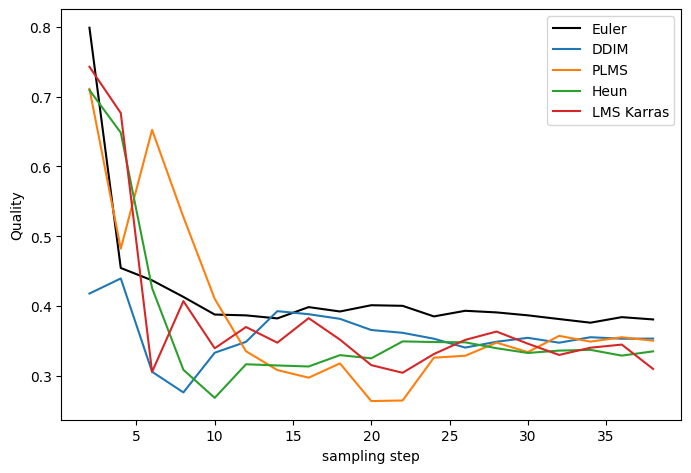

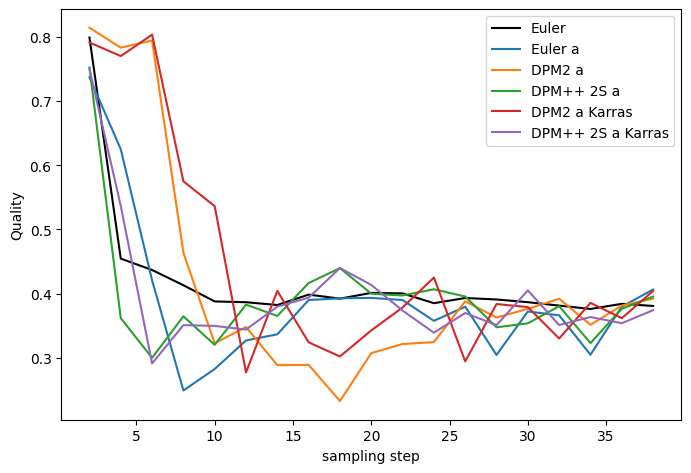

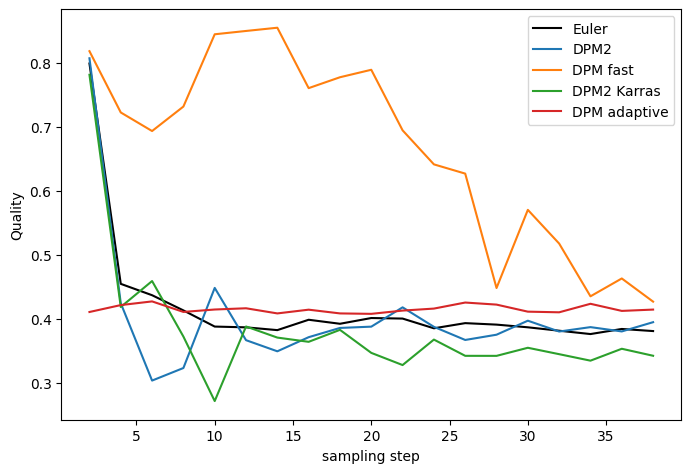

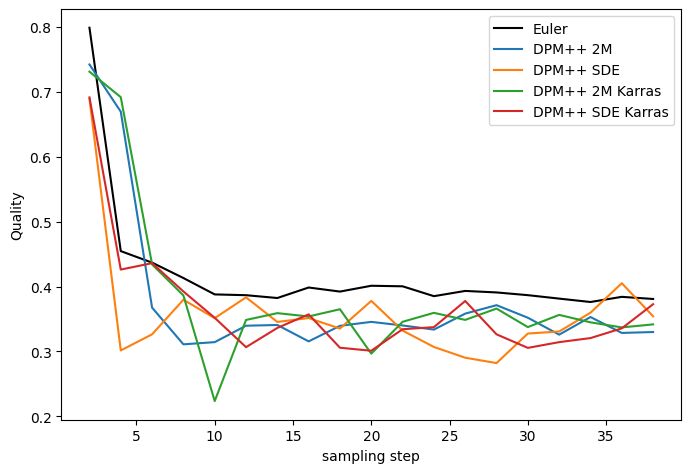

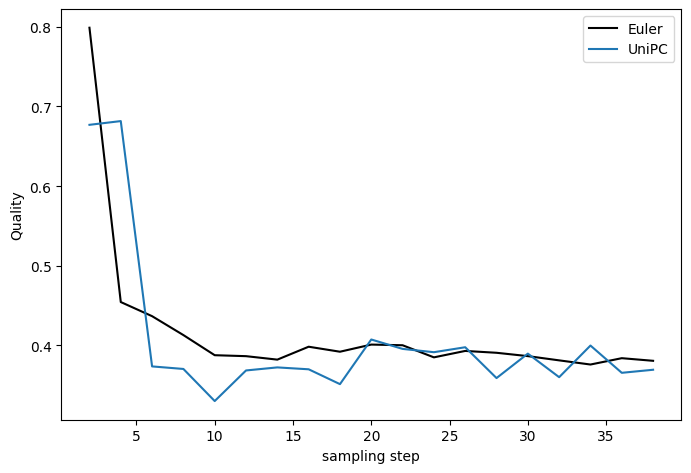

In [ ]:
iqa_metric = pyiqa.create_metric('clipiqa', device=device)
import os
samplerQuality = {}
for samplerDir in samplers:
  imgFiles = sorted(glob.glob(samplerDir +'/*'))
  name = sampleNameFromDir(samplerDir)
  qual = []
  for imgf in imgFiles:
    try:
      score = 1-float(iqa_metric(imgf))
    except:
      score = 100
    qual.append(score)
  samplerQuality[name] = qual

# plot
import matplotlib.pyplot as plt
steps = range(2,42,2)


figLength = 8

numPlotted = 0
samplerGroups = []

samplerGroups.append( ['DDIM', 'PLMS', 'Heun', 'LMS Karras'] )

# ancestral samplers
samplersToPlot = [name for name in samplerQuality if ' a' in name and not 'adaptive' in name]
samplerGroups.append( samplersToPlot)
# DPM solvers
samplersToPlot = [name for name in samplerQuality if 'DPM' in name and not '++' in name and not ' a' in name]
samplersToPlot.append('DPM adaptive')
samplerGroups.append( samplersToPlot)

# DPM++ solvers
samplersToPlot = [name for name in samplerQuality if '++' in name and not ' a' in name]
samplerGroups.append( samplersToPlot)

#

samplersToPlot = ['UniPC']
samplerGroups.append( samplersToPlot)

ref = 'Euler'
for samplersToPlot in samplerGroups:
  plt.figure(figsize = (figLength,figLength*2/3))
  plt.plot(steps[0:-1], samplerQuality[ref][0:-1], 'k')
  legstr = []
  legstr.append('Euler')

  
  ref = 'Euler'  
  for sampler in samplersToPlot:
    if sampler == ref: continue
    plt.plot(steps[0:-1], samplerQuality[sampler][0:-1])
    legstr.append(sampler)
    numPlotted += 1
  plt.legend(legstr)
  plt.xlabel('sampling step')
  plt.ylabel('Quality')
  #plt.ylim([-20,100])



In [ ]:
iqa_metric(tuple(imgFiles))

Exception: ignored